In [42]:
import numpy as np
import pandas as pd

from pydataset import data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import acquire
import prepare

In [ ]:
# Exercises
# Using the titanic data, in your classification-exercises repository, create a notebook, 
# model.ipynb where you will do the following:

# What is your baseline prediction? What is your baseline accuracy? remember: your baseline 
# prediction for a classification problem is predicting the most prevelant class in the 
# training dataset (the mode). When you make those predictions, 
# what is your accuracy? This is your baseline accuracy.

# Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

# Evaluate your in-sample results using the model score, confusion matrix, and classification report.

# Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, 
# recall, f1-score, and support.

# Run through steps 2-4 using a different max_depth value.

# Which model performs better on your in-sample data?

# Which model performs best on your out-of-sample data, the validate set?

# Work through these same exercises using the Telco dataset.
# Experiment with this model on other datasets with a higher number of output classes.

In [23]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [24]:
df = prepare.prep_titanic_data(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   pclass           891 non-null    int64  
 3   sex              891 non-null    object 
 4   age              714 non-null    float64
 5   sibsp            891 non-null    int64  
 6   parch            891 non-null    int64  
 7   fare             891 non-null    float64
 8   embarked         891 non-null    object 
 9   class            891 non-null    object 
 10  embark_town      891 non-null    object 
 11  alone            891 non-null    int64  
 12  embarked_encode  891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 94.0+ KB


In [26]:
#nulls in the age column
df.age = df.age.fillna(df.age.mean())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   pclass           891 non-null    int64  
 3   sex              891 non-null    object 
 4   age              891 non-null    float64
 5   sibsp            891 non-null    int64  
 6   parch            891 non-null    int64  
 7   fare             891 non-null    float64
 8   embarked         891 non-null    object 
 9   class            891 non-null    object 
 10  embark_town      891 non-null    object 
 11  alone            891 non-null    int64  
 12  embarked_encode  891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 94.0+ KB


In [28]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [29]:
#drop additional columns
df = df.drop(columns=['pclass', 'embarked', 'embarked_encode', 'passenger_id'])
df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,0
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,Southampton,1


In [30]:
#encode additional object/cols
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,1,0,1,0,0,1


In [31]:
#train test validate from prepare
train, validate, test = prepare.split(df, stratify_by='survived')

In [32]:
#makesure the target variable is separated from x
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [37]:
#establish baseline, whats mode?
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [38]:
#baseline
baseline = y_train.mode()
#boolean to match baseline prediction and reality
matches_baseline_prediction = (y_train==0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")                              


Baseline accuracy: 0.62


In [ ]:
# Fit the decision tree classifier to your training sample and transform 
#(i.e. make predictions on the training sample)

In [39]:
#model
tree1 = DecisionTreeClassifier(max_depth=5, random_state=123)

#fit the model on train
tree1 = tree1.fit(X_train, y_train)

#utilize model
y_predictions = tree1.predict(X_train)

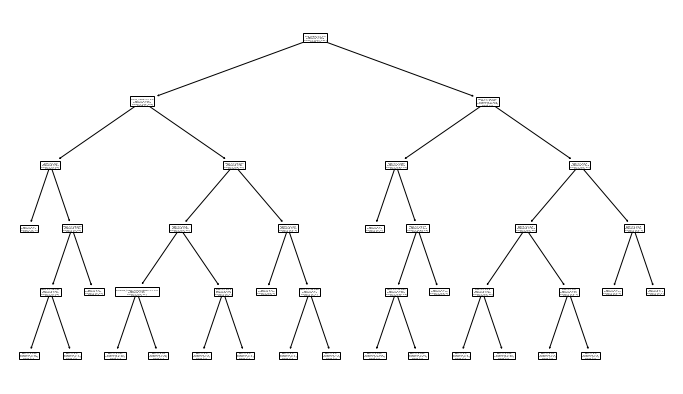

In [43]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [ ]:
# Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [44]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.85


C:\Users\Timmy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


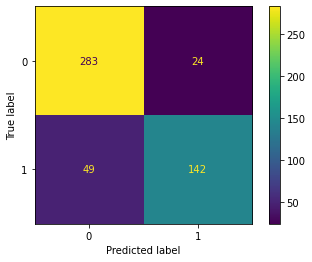

In [45]:
plot_confusion_matrix(tree1, X_train, y_train)

In [46]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       307
           1       0.86      0.74      0.80       191

    accuracy                           0.85       498
   macro avg       0.85      0.83      0.84       498
weighted avg       0.85      0.85      0.85       498



In [48]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.852410,0.855422,0.853414,0.853916,0.853565
recall,0.921824,0.743455,0.853414,0.832640,0.853414
f1-score,0.885759,0.795518,0.853414,0.840639,0.851149
support,307.000000,191.000000,0.853414,498.000000,498.000000


In [ ]:
# Compute: Accuracy, true positive rate, false positive rate, true negative rate, 
# false negative rate, precision, recall, f1-score, and support.

In [50]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

TN, FP, FN, TP

(283, 24, 49, 142)

In [51]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [52]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8534136546184738 

True Positive Rate/Sensitivity/Recall/Power: 0.743455497382199 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0781758957654723 

True Negative Rate/Specificity/Selectivity: 0.9218241042345277 

False Negative Rate/Miss Rate: 0.25654450261780104 

Precision/PPV: 0.8554216867469879 

F1 Score: 0.7955182072829131 

Support (0): 307 

Support (1): 191


In [ ]:
# Run through using a different max_depth value.

In [56]:
# loop to adjust depth
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

In [ ]:
#depth of 15 produces the highest accuracy

In [ ]:
# Which model performs best on your out-of-sample data, the validate set?

In [62]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,25):
    tree = DecisionTreeClassifier(max_depth= i, random_state=123) #make model 

    tree = tree.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=tree.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)#use model on validate
    
    output = {
        "max_depth":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.803738,0.049675
5,6,0.865462,0.785047,0.080415
6,7,0.877510,0.747664,0.129846
7,8,0.897590,0.771028,0.126562
8,9,0.923695,0.771028,0.152667
9,10,0.937751,0.775701,0.162050


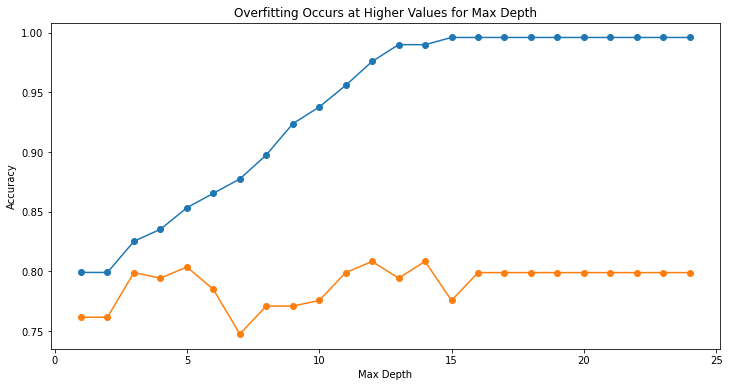

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [64]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.853414,0.803738,0.049675
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.785047,0.080415
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
